![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_covid_19.ipynb)



# Training a Sentiment Analysis Classifier with NLU
## 2 Class COVID-19 Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>

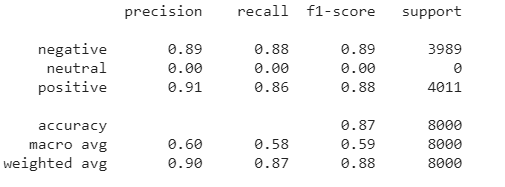


You can achieve these results or even better on this dataset with training data:


<br>

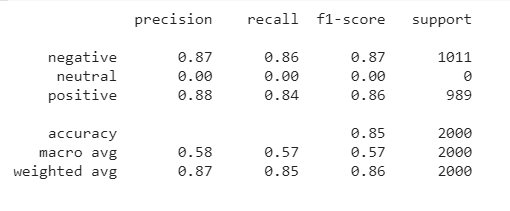

# 1. Install Java 8 and NLU

In [ ]:
!pip install -q johnsnowlabs

# 2. Download Coivd19 NLP Text Sentiemnt Classifcation    dataset
https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
#Context

This is a Dataset made of tweets about covid 19

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/corona_nlp/Corona_NLP_train.csv

In [1]:
import pandas as pd
train_path = '/content/Corona_NLP_train.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[~train_df["y"].isin(["neutral"])]

train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
20175,WhatÂs the world most dangerous job?\r\r\nSup...,negative
32442,Check out how Coronavirus is transforming Cons...,positive
4860,this was an HOUR after opened My dad was shook...,negative
12605,ScriptCo members have their medications delive...,positive
6444,As we continue to monitor the situation concer...,positive
...,...,...
34114,Cracking Down on Retail COVID 19 Profiteers in...,positive
36475,@SethAbramson Work. I am very fortunate to hav...,positive
29755,Create a free Amazon Business account to save ...,positive
39000,Best online stores to buy things from Tokyo an...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [33]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


/usr/local/lib/python3.10/dist-packages/nlu/pipe/pipeline.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.y = dataset.y.apply(str)
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin_index'] = data.index
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        21
    positive       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Over 45 tar sands projects that have already s...,"[-0.040878042578697205, 0.7422170639038086, -1...",positive,4.0,Over 45 tar sands projects that have already s...,positive
1,I just got super excited because I found toile...,"[-0.8823249340057373, 0.2473045289516449, -0.2...",positive,1.0,I just got super excited because I found toile...,positive
2,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...","[-0.5860391855239868, 0.45967912673950195, -0....",positive,3.0,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...",positive
3,A lady fro @CheckersSA Brits tells me to hide ...,"[-1.0504486560821533, 0.03315277025103569, -0....",positive,2.0,A lady fro @CheckersSA Brits tells me to hide ...,positive
4,Just done an online shop and all the food esse...,"[-0.7228847742080688, 0.12011835724115372, -0....",positive,3.0,Just done an online shop and all the food esse...,negative
5,@GavinNewsom so let me get this straight crowd...,"[-0.7876735329627991, -0.0005504372529685497, ...",positive,2.0,@GavinNewsom so let me get this straight crow...,negative
6,NY: 18- to 49-year-olds make up more than half...,"[-0.7093901634216309, 0.15827353298664093, -0....",positive,2.0,NY: 18- to 49-year-olds make up more than half...,negative
7,Emerging market debt prices reflect worst case...,"[-0.38020092248916626, 0.469475656747818, -1.0...",positive,1.0,Emerging market debt prices reflect worst case...,negative
8,do you clean your #supermarket items due to th...,"[-0.9434630870819092, 0.15352500975131989, -0....",positive,3.0,do you clean your #supermarket items due to t...,positive
9,@flipkartsupport @rsprasad @PMOIndia In his cr...,"[-0.5607839226722717, 0.01385028287768364, -0....",positive,3.0,@flipkartsupport @rsprasad\r\r\n@PMOIndia In h...,negative


In [34]:
preds

,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Over 45 tar sands projects that have already s...,"[-0.040878042578697205, 0.7422170639038086, -1...",positive,4.0,Over 45 tar sands projects that have already s...,positive
1,I just got super excited because I found toile...,"[-0.8823249340057373, 0.2473045289516449, -0.2...",positive,1.0,I just got super excited because I found toile...,positive
2,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...","[-0.5860391855239868, 0.45967912673950195, -0....",positive,3.0,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...",positive
3,A lady fro @CheckersSA Brits tells me to hide ...,"[-1.0504486560821533, 0.03315277025103569, -0....",positive,2.0,A lady fro @CheckersSA Brits tells me to hide ...,positive
4,Just done an online shop and all the food esse...,"[-0.7228847742080688, 0.12011835724115372, -0....",positive,3.0,Just done an online shop and all the food esse...,negative
5,@GavinNewsom so let me get this straight crowd...,"[-0.7876735329627991, -0.0005504372529685497, ...",positive,2.0,@GavinNewsom so let me get this straight crow...,negative
6,NY: 18- to 49-year-olds make up more than half...,"[-0.7093901634216309, 0.15827353298664093, -0....",positive,2.0,NY: 18- to 49-year-olds make up more than half...,negative
7,Emerging market debt prices reflect worst case...,"[-0.38020092248916626, 0.469475656747818, -1.0...",positive,1.0,Emerging market debt prices reflect worst case...,negative
8,do you clean your #supermarket items due to th...,"[-0.9434630870819092, 0.15352500975131989, -0....",positive,3.0,do you clean your #supermarket items due to t...,positive
9,@flipkartsupport @rsprasad @PMOIndia In his cr...,"[-0.5607839226722717, 0.01385028287768364, -0....",positive,3.0,@flipkartsupport @rsprasad\r\r\n@PMOIndia In h...,negative


# 4. Test the fitted pipe on new example

In [35]:
fitted_pipe.predict("Everything is under control !")

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,Everything is under control !,"[-1.6309462785720825, 0.7175763845443726, -0.7...",positive,0.999999


## 5. Configure pipe training parameters

In [36]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

##6. Retrain with new parameters

In [37]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


/usr/local/lib/python3.10/dist-packages/nlu/pipe/pipeline.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.y = dataset.y.apply(str)
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin_index'] = data.index
/usr/local/lib/python3.10/dist-packages/nlu/pipe/utils/data_conversion_utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        21
    positive       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



/usr/local/lib/python3.10/dist-packages/nlu/pipe/extractors/extractor_methods/base_extractor_methods.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_explode] = df[cols_to_explode].apply(pad_same_level_cols, axis=1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Over 45 tar sands projects that have already s...,"[-0.040878042578697205, 0.7422170639038086, -1...",positive,3.0,Over 45 tar sands projects that have already s...,positive
1,I just got super excited because I found toile...,"[-0.8823249340057373, 0.2473045289516449, -0.2...",positive,2.0,I just got super excited because I found toile...,positive
2,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...","[-0.5860391855239868, 0.45967912673950195, -0....",positive,2.0,"BE AFRAID, BE VERY AFRAIDÂINSLEE PROMOTES THE...",positive
3,A lady fro @CheckersSA Brits tells me to hide ...,"[-1.0504486560821533, 0.03315277025103569, -0....",positive,7.0,A lady fro @CheckersSA Brits tells me to hide ...,positive
4,Just done an online shop and all the food esse...,"[-0.7228847742080688, 0.12011835724115372, -0....",positive,1.0,Just done an online shop and all the food esse...,negative
5,@GavinNewsom so let me get this straight crowd...,"[-0.7876735329627991, -0.0005504372529685497, ...",positive,7.0,@GavinNewsom so let me get this straight crow...,negative
6,NY: 18- to 49-year-olds make up more than half...,"[-0.7093901634216309, 0.15827353298664093, -0....",positive,3.0,NY: 18- to 49-year-olds make up more than half...,negative
7,Emerging market debt prices reflect worst case...,"[-0.38020092248916626, 0.469475656747818, -1.0...",positive,4.0,Emerging market debt prices reflect worst case...,negative
8,do you clean your #supermarket items due to th...,"[-0.9434630870819092, 0.15352500975131989, -0....",positive,3.0,do you clean your #supermarket items due to t...,positive
9,@flipkartsupport @rsprasad @PMOIndia In his cr...,"[-0.5607839226722717, 0.01385028287768364, -0....",positive,1.0,@flipkartsupport @rsprasad\r\r\n@PMOIndia In h...,negative


# 7. Try training with different Embeddings

In [39]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [4]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df[:500])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df[:500],output_level='document')

#sentence detector that is part of the pipe generates some NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.84      0.56      0.67       229
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.71      0.78       271

    accuracy                           0.64       500
   macro avg       0.57      0.42      0.48       500
weighted avg       0.85      0.64      0.73       500



# 7.1 evaluate on Test Data

In [5]:
preds = fitted_pipe.predict(test_df[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.68      0.35      0.47        48
     neutral       0.00      0.00      0.00         0
    positive       0.77      0.63      0.69        52

    accuracy                           0.50       100
   macro avg       0.48      0.33      0.39       100
weighted avg       0.73      0.50      0.58       100



# 8. Lets save the model

In [6]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [7]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('Everything is under control !')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,Everything is under control !,"[0.37780365347862244, 0.29955413937568665, 0.1...",negative,0.0


In [8]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[